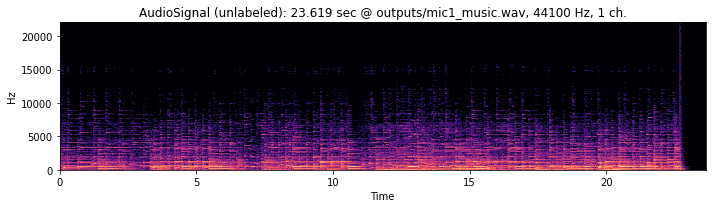

In [4]:
import nussl
import matplotlib.pyplot as plt
import time


audio_path = "outputs/mic1_music.wav"
history = nussl.AudioSignal(audio_path)
history.embed_audio()

plt.figure(figsize=(10, 3))
nussl.utils.visualize_spectrogram(history)
plt.title(str(history))
plt.tight_layout()
plt.show()

In [5]:
def visualize_and_embed(sources):
    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    nussl.utils.visualize_sources_as_masks(sources,
        y_axis='mel', db_cutoff=-40, alpha_amount=2.0)
    plt.subplot(212)
    nussl.utils.visualize_sources_as_waveform(
        sources, show_legend=False)
    plt.show()
    nussl.play_utils.multitrack(sources)

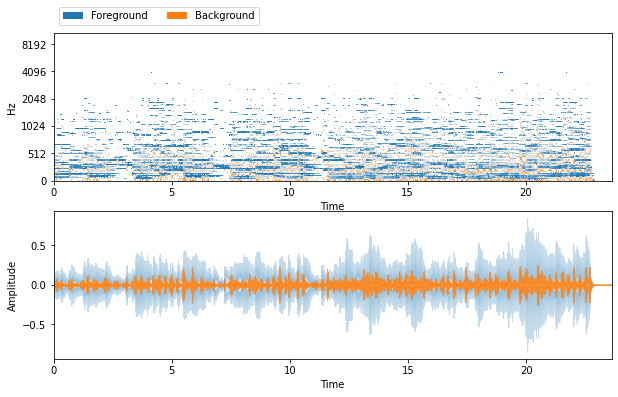


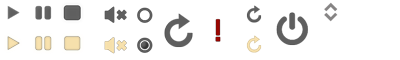
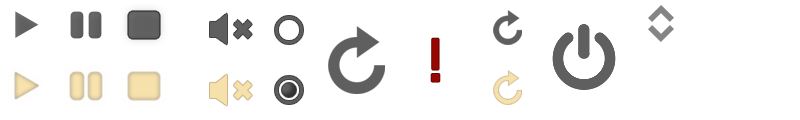
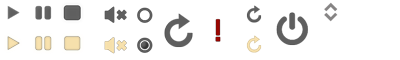

In [6]:
hpss = nussl.separation.primitive.HPSS(history)
masks = hpss.run()
estimates = hpss.make_audio_signals()

_estimates = {
    'Foreground': estimates[0],
    'Background': estimates[1]
} # organize estimates into a dict

visualize_and_embed(_estimates)

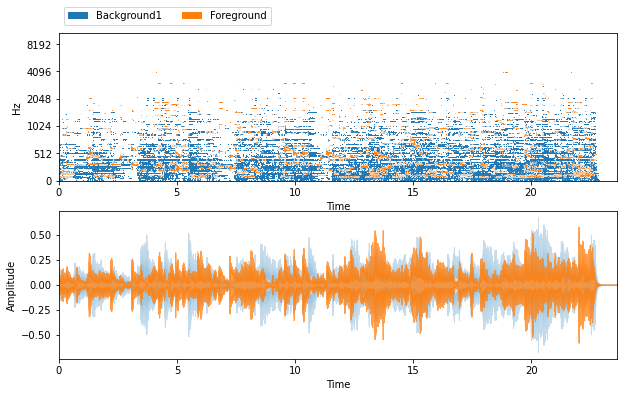


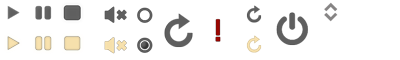
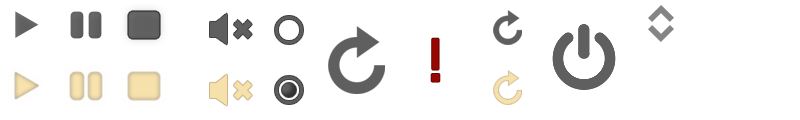
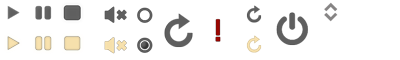

In [7]:
ICA = nussl.separation.factorization.RPCA(history)
masks = ICA.run()
estimates = ICA.make_audio_signals()

_estimates = {
    'Background1': estimates[0],
    'Foreground': estimates[1]
} # organize estimates into a dict

visualize_and_embed(_estimates)

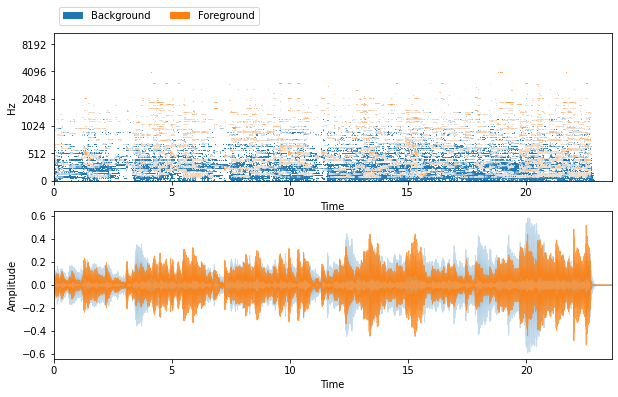


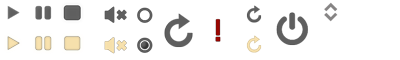
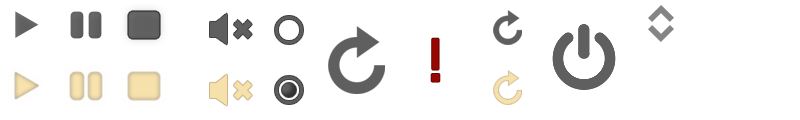
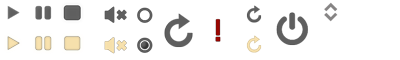

In [8]:
FTD2 = nussl.separation.primitive.FT2D(history)
masks = FTD2.run()
estimates = FTD2.make_audio_signals()


_estimates = {
    'Background': estimates[0],
    'Foreground': estimates[1], 
} # organize estimates into a dict

visualize_and_embed(_estimates)

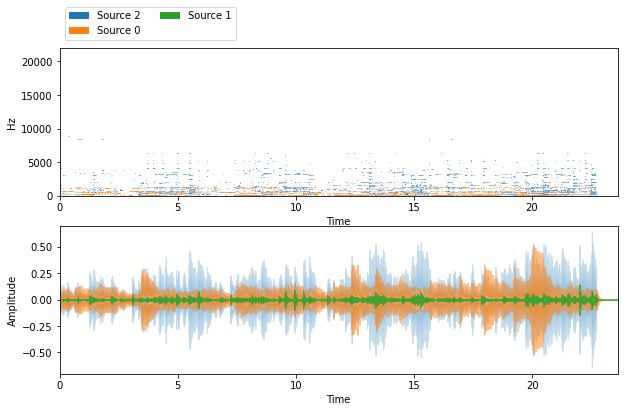


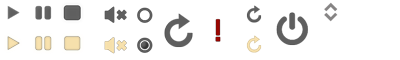
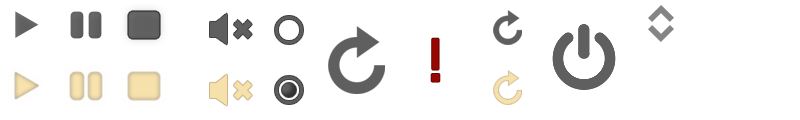
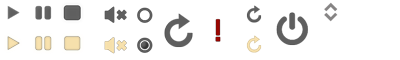

In [11]:
import numpy as np
h = history

separators = [
    nussl.separation.primitive.FT2D(h),
    nussl.separation.primitive.HPSS(h),
]

weights = [2, 1]
returns = [[1], [1]]

fixed_centers = np.array([
    [0 for i in range(sum(weights))],
    [1 for i in range(sum(weights))],
    [0.5 for i in range(sum(weights))],
])

ensemble = nussl.separation.composite.EnsembleClustering(
    h, 3, separators=separators, init=fixed_centers,
    fit_clusterer=False, weights=weights, returns=returns)
ensemble.clusterer.cluster_centers_ = fixed_centers
estimates = ensemble()

_estimates = {
    f'Source {i}': e for i, e in enumerate(estimates)
} # organize estimates into a dict

visualize_and_embed(_estimates)

In [9]:
model_path = nussl.efz_utils.download_trained_model(
    'dpcl-wsj2mix-model.pth')

separator = nussl.separation.deep.DeepClustering(
    history, 2, model_path=model_path)
estimates = separator()

estimates = {
    f'Speaker {i}': e for i, e in enumerate(estimates)
}

visualize_and_embed(estimates)

Saving file at C:\Users\yinji\.nussl\models\dpcl-wsj2mix-model.pth
dpcl-wsj2mix-model.pth...100%


SeparationException: Failed loading model. Expected to find 'nussl_version' in C:\Users\yinji\.nussl\models\dpcl-wsj2mix-model.pth.

In [10]:

import nussl
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings("ignore")
start_time = time.time()

def visualize_and_embed(sources):
    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    nussl.utils.visualize_sources_as_masks(sources,
        y_axis='linear', db_cutoff=-40, alpha_amount=2.0)
    plt.subplot(212)
    nussl.utils.visualize_sources_as_waveform(
        sources, show_legend=False)
    plt.show()
    nussl.play_utils.multitrack(sources)

model_path = nussl.efz_utils.download_trained_model(
    'mask-inference-wsj2mix-model-v1.pth')
audio_path = nussl.efz_utils.download_audio_file(
    'wsj_speech_mixture_ViCfBJj.mp3')
audio_signal = nussl.AudioSignal(audio_path)
separator = nussl.separation.deep.DeepMaskEstimation(
    audio_signal, mask_type='soft', model_path=model_path)
estimates = separator()

estimates = {
    f'Speaker {i}': e for i, e in enumerate(estimates)
}

visualize_and_embed(estimates)

Saving file at C:\Users\yinji\.nussl\models\mask-inference-wsj2mix-model-v1.pth
mask-inference-wsj2mix-model-v1.pth...100%
Saving file at C:\Users\yinji\.nussl\audio\wsj_speech_mixture_ViCfBJj.mp3
wsj_speech_mixture_ViCfBJj.mp3...94%


SeparationException: Failed loading model. Expected to find 'nussl_version' in C:\Users\yinji\.nussl\models\mask-inference-wsj2mix-model-v1.pth.